# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Feb 4, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: _Yunjie Xu__  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: _1008601951__

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [2]:
## Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn  import preprocessing as pp
from sklearn import neighbors
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? ___
* How many observations have a 'mean area' of greater than 700? ___
* How many participants tested `Malignant`? ___
* How many participants tested `Benign`? ___

In [3]:
## Create a dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
# How many features do we have in this dataset? ___
print(f"There are {len(df.columns) -1} features in this dataset.")

There are 30 features in this dataset.


In [5]:
# How many observations have a 'mean area' of greater than 700? 
print(f"There are {df[df['mean area'] > 700].shape[0]} observations have a'mean area'of greater than 700")

There are 171 observations have a'mean area'of greater than 700


In [6]:
# How many participants tested Malignant? ___
print(f"There are {df[df['target'] == 0].shape[0]} participants tested Malignant.")

There are 212 participants tested Malignant.


In [7]:
# How many participants tested Benign? ___
print(f"There are {df[df['target'] == 1].shape[0]} participants tested Benign.")

There are 357 participants tested Benign.


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [8]:
### YOUR CODE HERE ###
X = df.drop('target', axis='columns').values
y = df.target.values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




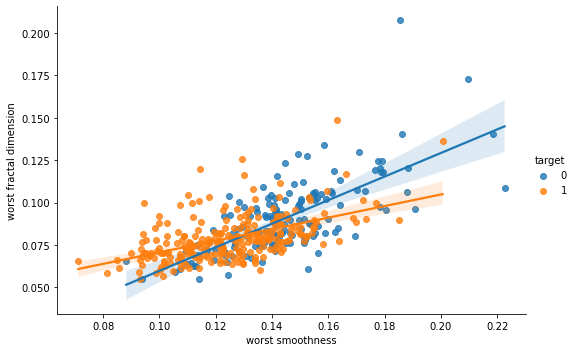

In [9]:
### YOUR CODE HERE ###

df_sns = pd.DataFrame(X_train,columns=dataset.feature_names)
df_sns['target'] = y_train

# Before standardizing
plot_before_standardizing = sns.lmplot(x = 'worst smoothness', 
                                       y = 'worst fractal dimension', 
                                       hue = 'target',
                                       data = df_sns,
                                       aspect = 1.5)

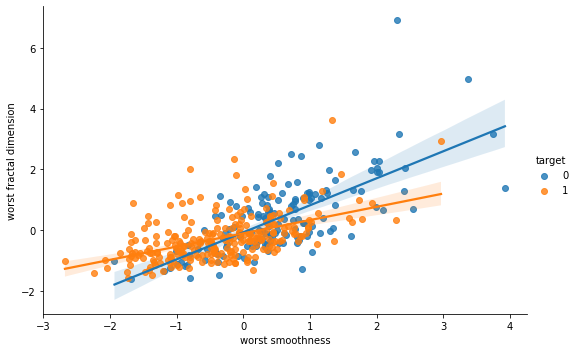

In [10]:
# Standardizing Process
df_sns['worst smoothness'] = pp.scale(df_sns['worst smoothness'])
df_sns['worst fractal dimension'] = pp.scale(df_sns['worst fractal dimension'])

# After standardizing
plot_after_standardizing = sns.lmplot(x = 'worst smoothness', 
                                      y = 'worst fractal dimension', 
                                      hue = 'target', 
                                      data = df_sns,
                                      aspect = 1.5)

In [11]:
# What's different? Based on your observation, what is the advantage of standardization? 

'''
1) The numbers on the both x_axes and y_axes have changed, which equal means the sacle of 
two features adjust to the same scale.
'''

'\n1) The numbers on the both x_axes and y_axes have changed, which equal means the sacle of \ntwo features adjust to the same scale.\n'

In [12]:
# Based on your observation, what is the advantage of standardization? 

'''
2) Different fetatures have different scale,people cannot directly compare with features which have different scale.Thus one of advantages
of standardization is that can make people to compare the influence between features. Another advantage is standardlization
can imporve the quality of data and minimize the influences of varing scales.
'''

'\n2) Different fetatures have different scale,people cannot directly compare with features which have different scale.Thus one of advantages\nof standardization is that can make people to compare the influence between features. Another advantage is standardlization\ncan imporve the quality of data and minimize the influences of varing scales.\n'

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




In [13]:
### YOUR CODE HERE ###

# KNN Algorithm 
cv_scores_test = []
cv_scores_train = []

for k in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_validate(knn,
                            X_train,
                            y_train,
                            cv = 5, 
                            return_train_score = True)
    cv_scores_test.append(scores['test_score'].mean())
    cv_scores_train.append(scores['train_score'].mean())


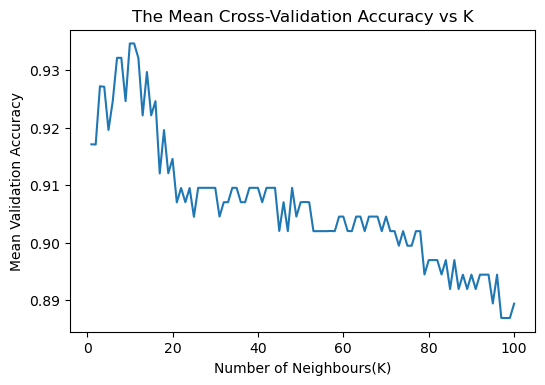

In [14]:
plt.figure(dpi=100)
plt.plot(range(1,101),cv_scores_test)
plt.title('The Mean Cross-Validation Accuracy vs K')
plt.xlabel('Number of Neighbours(K)')
plt.ylabel('Mean Validation Accuracy')
plt.show()

In [15]:
## Select the best k and its model accuracy.
print(f'The highest model acccuracy is {max(cv_scores_test)}.')
print(f'The best k is {cv_scores_test.index(max(cv_scores_test))+1}.') 

The highest model acccuracy is 0.9346518987341772.
The best k is 10.


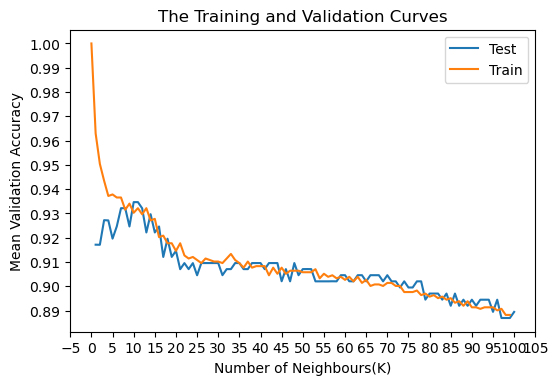

In [16]:
plt.figure(dpi=100)
plt.plot(range(1,101),cv_scores_test,cv_scores_train)
plt.title('The Training and Validation Curves')
plt.legend(['Test','Train'])
plt.xlabel('Number of Neighbours(K)')
plt.ylabel('Mean Validation Accuracy')

## set axis scale
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(0.01))

plt.show()

In [17]:
# Comment on which ranges of k lead to underfitted or overfitted models (hint: compare training and validation curves!).

'''
when k is 1 to 7, the training accuracy is signifcantly higher than test accuracy, which indicates overfit.
when k is above 15，both training accuracy and test accuracy drop signifcantly，which indicates underfit.
'''

'\nwhen k is 1 to 7, the training accuracy is signifcantly higher than test accuracy, which indicates overfit.\nwhen k is above 15，both training accuracy and test accuracy drop signifcantly，which indicates underfit.\n'

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [18]:
def Feature_selector (X_train , y_train , tr=0.95):
    
    ### YOUR CODE HERE ###
      
    ## Find the full feature cross-validation accuracy.
    cv_scores_test_full_feature = []
    
    for k in range(1,101):
        knn = neighbors.KNeighborsClassifier(n_neighbors = k)
        scores = cross_validate(knn,
                            X_train,
                            y_train,
                            cv = 5, 
                            return_train_score = True)
        cv_scores_test_full_feature.append(scores['test_score'].mean())
    
    c = max(cv_scores_test_full_feature)  ## Full Feature cross-validation accuracy.
    
    ## Fit the decision tree and extract feature importance.
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train,y_train)
    importance = model.feature_importances_
    
    obj = pd.Series(importance, index= dataset.feature_names).sort_values()
    df_fs = pd.DataFrame(X_train,columns= dataset.feature_names)
    i = 30
    

    ## Two list for store mean cross-validation score and corresponding k.
    Model_Accuracy = []
    Best_K = []
    Features_list = [] ## List for collecting features from least important to the most important
   
    ## While loop for dropping features.
    while i > 1: ## the number of features will at least be 1 if we set i>1 here.

        cv_scores_test = []
        
        ## for loop for selecting k
        for k in range(1,101):
            knn = neighbors.KNeighborsClassifier(n_neighbors = k)
            scores = cross_validate(knn,
                            df_fs.values,
                            y_train,
                            cv = 5, 
                            return_train_score = True)
            cv_scores_test.append(scores['test_score'].mean())
            
        a = max(cv_scores_test) 
        b = cv_scores_test.index(max(cv_scores_test))+1
        
        ## Stop removing features features if.....
        if a > tr*c:
            Model_Accuracy.append(a)
            Best_K.append(b)
            Features_list.append(obj.nsmallest(1).index[0])
            
            df_fs = df_fs.drop([obj.nsmallest(1).index[0]], axis='columns')
            obj = obj.drop(obj.nsmallest(1).index[0])
    
            i = i - 1
            
        else:
            break
            
    return Model_Accuracy,Best_K,Features_list
          

In [19]:
List_1,List_2,List_4 = Feature_selector (X_train , y_train , tr=0.95)

In [20]:
# The best mean cross-validation score 
print(f'The best mean cross-validation score list is: {List_1}')

The best mean cross-validation score list is: [0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9321518987341773, 0.9321518987341773, 0.9321518987341773, 0.9321518987341773, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145886075949367]


In [21]:
# The corresponding k (number of neighbours) value
print(f'The corresponding k is: {List_2}')

The corresponding k is: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 61, 61, 61, 61, 61, 61, 61, 61, 64, 64, 34]


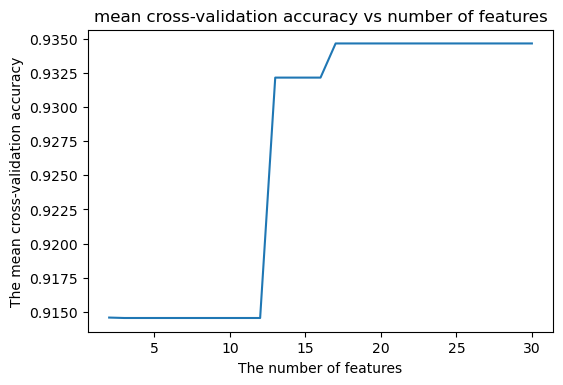

In [22]:
# The mean cross-validation accuracy (with a tuned k on y axis) vs. the number of features (x axis).
x = np.arange(31-len(List_1),31)
y = np.array(List_1[::-1])

plt.figure(dpi=100)
plt.plot(x,y)
plt.title('mean cross-validation accuracy vs number of features')
plt.xlabel('The number of features')
plt.ylabel('The mean cross-validation accuracy')
plt.show()

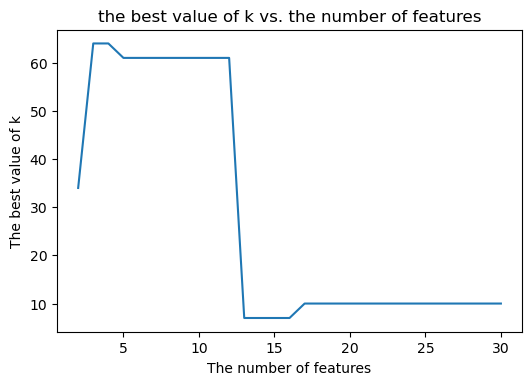

In [23]:
# The best value of k (y-axis) vs. the number of features. 

x = np.arange(31-len(List_1),31)
y = np.array(List_2[::-1])

plt.figure(dpi=100)
plt.plot(x,y)
plt.title('the best value of k vs. the number of features')
plt.xlabel('The number of features')
plt.ylabel('The best value of k')
plt.show()

In [24]:
List_4 = List_4[::-1]

In [25]:
# State what is the number of essential features for classification and justify your answer.

print(f'The Top 15 essential features are: {List_4[0:15]}')

print(f'The Top 20 essential features are: {List_4[0:20]}')

'''
From the plot of mean cross-validation accuracy vs number of features, we know that the number of essential features are 15-20,
Because the model accuracy significantly improve after number of features above 15.And the model accuracy is been constant after 
about 20 features . And I think my answer is right because the return value of full features accuracy in part3 is the same as the 
value in part 2.
'''

The Top 15 essential features are: ['worst area', 'area error', 'worst symmetry', 'worst texture', 'mean concavity', 'mean symmetry', 'smoothness error', 'worst concavity', 'fractal dimension error', 'worst smoothness', 'mean concave points', 'mean area', 'mean compactness', 'mean smoothness', 'radius error']
The Top 20 essential features are: ['worst area', 'area error', 'worst symmetry', 'worst texture', 'mean concavity', 'mean symmetry', 'smoothness error', 'worst concavity', 'fractal dimension error', 'worst smoothness', 'mean concave points', 'mean area', 'mean compactness', 'mean smoothness', 'radius error', 'mean perimeter', 'mean texture', 'mean fractal dimension', 'worst fractal dimension', 'texture error']


'\nFrom the plot of mean cross-validation accuracy vs number of features, we know that the number of essential features are 15-20,\nBecause the model accuracy significantly improve after number of features above 15.And the model accuracy is been constant after \nabout 20 features . And I think my answer is right because the return value of full features accuracy in part3 is the same as the \nvalue in part 2.\n'

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [26]:
### YOUR CODE HERE ###

# Standardize the training and test data 
scaler = pp.StandardScaler().fit(X_train)
X_ScaledTrain = scaler.transform(X_train)

scaler = pp.StandardScaler().fit(X_test)
X_ScaledTest = scaler.transform(X_test)


In [27]:
List_3,List_5,List_6 = Feature_selector (X_ScaledTrain, y_train , tr=0.95)

In [28]:
# Plot the Cross validation accuracy 
List_y = List_1[::-1]
List_ystd = List_3[::-1]
List_ystd[0] = List_y[0]

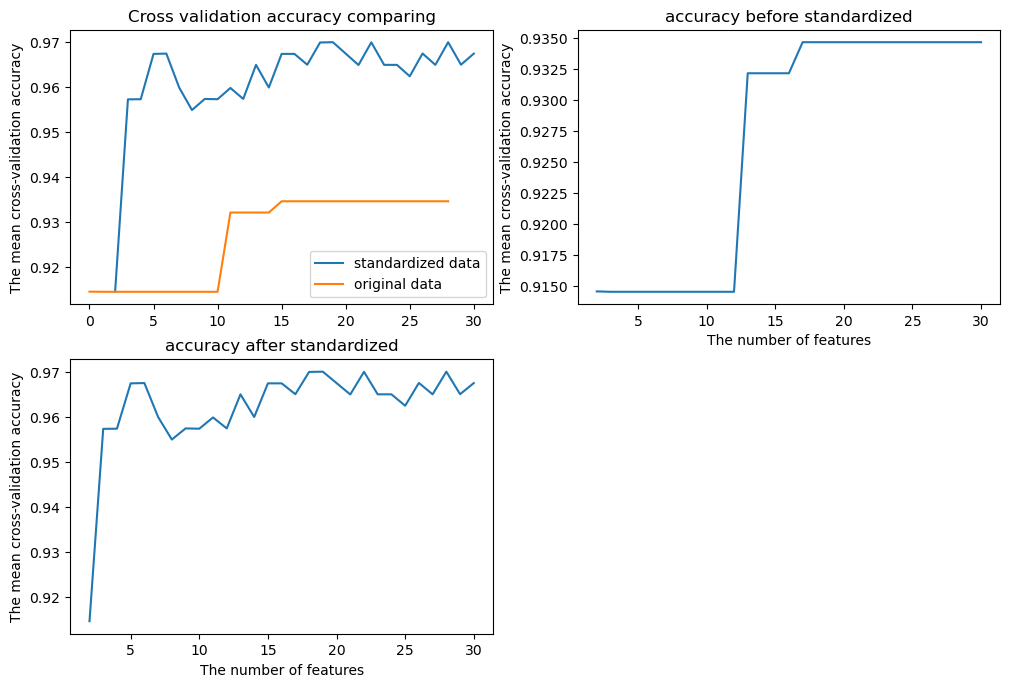

In [29]:
# Plot

x = np.arange(31-len(List_1),31)
y = np.array(List_y)
y_std = np.array(List_ystd)

plt.figure(dpi=100,figsize=(12,8))

#1 Comparing Plot
plt.subplot(2, 2, 1)
plt.plot(x,y_std,y)
plt.title('Cross validation accuracy comparing')
plt.ylabel('The mean cross-validation accuracy')
plt.legend(['standardized data','original data'])

#2 Cross validation accuracy for data before standardized
plt.subplot(2, 2, 2)
plt.plot(x,y)
plt.title('accuracy before standardized')
plt.xlabel('The number of features')
plt.ylabel('The mean cross-validation accuracy')


#3 Cross validation accuracy for data after standardized
plt.subplot(2, 2, 3)
plt.plot(x,y_std)
plt.title('accuracy after standardized')
plt.xlabel('The number of features')
plt.ylabel('The mean cross-validation accuracy')


plt.show()

In [30]:
## Discuss how standardization (helped/hurt) your model and its performance? 

'''
Standardization helped my model and improve the performance. Standardization standardize
all features' scale to the same scale and improve the data quality. Form the plot of the
mean cross-validation accuracy, it is easy to see that standardization improve the model 
accuracy
'''

"\nStandardization helped my model and improve the performance. Standardization standardize\nall features' scale to the same scale and improve the data quality. Form the plot of the\nmean cross-validation accuracy, it is easy to see that standardization improve the model \naccuracy\n"

In [31]:
## Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)
print(f'The best model with highest accuracy is:{max(List_3)}')
print(f'The best model with {List_3[::-1].index(max(List_3))} number of features.')
print(f'The best model K value is {List_5[List_3[::-1].index(max(List_3))]}.')
print(f'Selecting features below {List_6[::-1][0:List_3[::-1].index(max(List_3))]}.')

The best model with highest accuracy is:0.9699683544303797
The best model with 17 number of features.
The best model K value is 10.
Selecting features below ['worst area', 'area error', 'worst symmetry', 'worst texture', 'mean concavity', 'mean symmetry', 'smoothness error', 'worst concavity', 'fractal dimension error', 'worst smoothness', 'mean concave points', 'mean area', 'mean compactness', 'mean smoothness', 'radius error', 'mean perimeter', 'mean texture'].


## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [33]:
### YOUR CODE HERE ###

'''
The training dataset have 398 samples, thus the range of minimum number of samples 
required to split an internal node should be 2 to 398. 
And from documentation, we know that the maximum depth of the tree should %less
than min_samples_split samples
'''

cv_scores_test = []
n_list = []
i_list = []

for n in range(2,399):  ## min_samples_split
    for i in range(1,n): ## max_depth
        clf = DecisionTreeClassifier(random_state=0,
                                     max_depth= i,
                                     min_samples_split= n)
        scores = cross_validate(clf,
                            X_train,
                            y_train,
                            cv = 5, 
                            return_train_score = True)
        
        cv_scores_test.append(scores['test_score'].mean())
        n_list.append(n)
        i_list.append(i)       

In [34]:
## Model Accuracy：tree's performance (mean CV score)
max(cv_scores_test)

'''
The results of decision tree is very similar with the performance of KNN.
However, in my algorithm, decision tree needs is relatively complicated than
KNN. Computer needs more time to get results.
'''

'\nThe results of decision tree is very similar with the performance of KNN.\nHowever, in my algorithm, decision tree needs is relatively complicated than\nKNN. Computer needs more time to get results.\n'

In [35]:
## Best min_samples_split
n_list[cv_scores_test.index(max(cv_scores_test))]

8

In [36]:
## Best max_depth
i_list[cv_scores_test.index(max(cv_scores_test))]

5

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [37]:
### YOUR CODE HERE ###

'''
Feature Selection model with standardisation boost the highest CV accuracy thus 
I apply this model to the test dataset.
'''
## Apply model into test dataset
List_7,List_8,List_9 = Feature_selector (X_ScaledTest, y_test , tr=0.95)

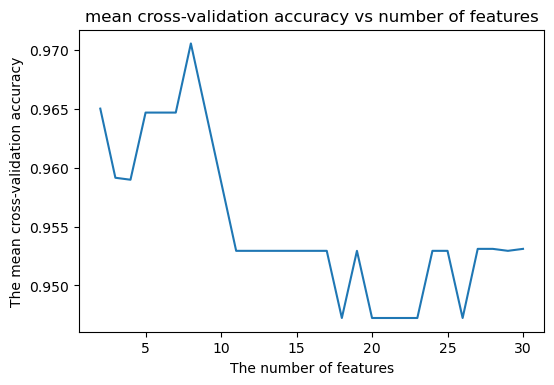

'\nFeature Selection model with standardisation boost the highest CV accuracy thus \nI apply this model to the test dataset.\n\nThe model accuracy is incrase with increase of features use initially, when the number of features reach 7\nthe model accuracy starts to decrase and imply that we use too many features to fit the model, which is overfit\nThis plot statisfy the theory of model selection.\n'

In [38]:
# The mean cross-validation accuracy (with a tuned k on y axis) vs. the number of features (x axis).
x = np.arange(31-len(List_7),31)
y = np.array(List_7[::-1])

plt.figure(dpi=100)
plt.plot(x,y)
plt.title('mean cross-validation accuracy vs number of features')
plt.xlabel('The number of features')
plt.ylabel('The mean cross-validation accuracy')
plt.show()

'''
Feature Selection model with standardisation boost the highest CV accuracy thus 
I apply this model to the test dataset.

The model accuracy is incrase with increase of features use initially, when the number of features reach 7
the model accuracy starts to decrase and imply that we use too many features to fit the model, which is overfit
This plot statisfy the theory of model selection.
'''

In [39]:
## Test Result 
print(f'The best model with highest accuracy is:{max(List_7)}')
print(f'The best model with {List_7[::-1].index(max(List_7))} number of features.')
print(f'The best model K value is {List_8[List_7[::-1].index(max(List_7))]}.')
print(f'Selecting features below {List_9[::-1][0:(List_7[::-1].index(max(List_7)))]}.')

The best model with highest accuracy is:0.9705882352941178
The best model with 6 number of features.
The best model K value is 11.
Selecting features below ['worst concave points', 'mean texture', 'worst smoothness', 'worst compactness', 'mean perimeter', 'mean fractal dimension'].


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/